First we read in the dataset from file.


In [1]:
import pandas as pd
data = pd.read_csv("dataset.csv")



Next we can clean the dataset. We drop the index column because it already exists (i think). Then we remove all duplicate values by checking the track id.

In [2]:
#drop index cus already is
data = data.drop("index", axis=1)
#print((data['track_id'] == "3nqQXoyQOWXiESFLlDF1hG").sum())
#removing duplicates
print(data.duplicated().sum())
data = data.drop_duplicates(subset=["track_id"])
print(data.duplicated().sum())

450
0


Next we remove the rows with duration = 0

In [3]:
data = data[data["duration_ms"] >= 1000]

We only found one row with empty values and since it had duration_ms as 0 then it has already been removed.
Next is EDA.

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


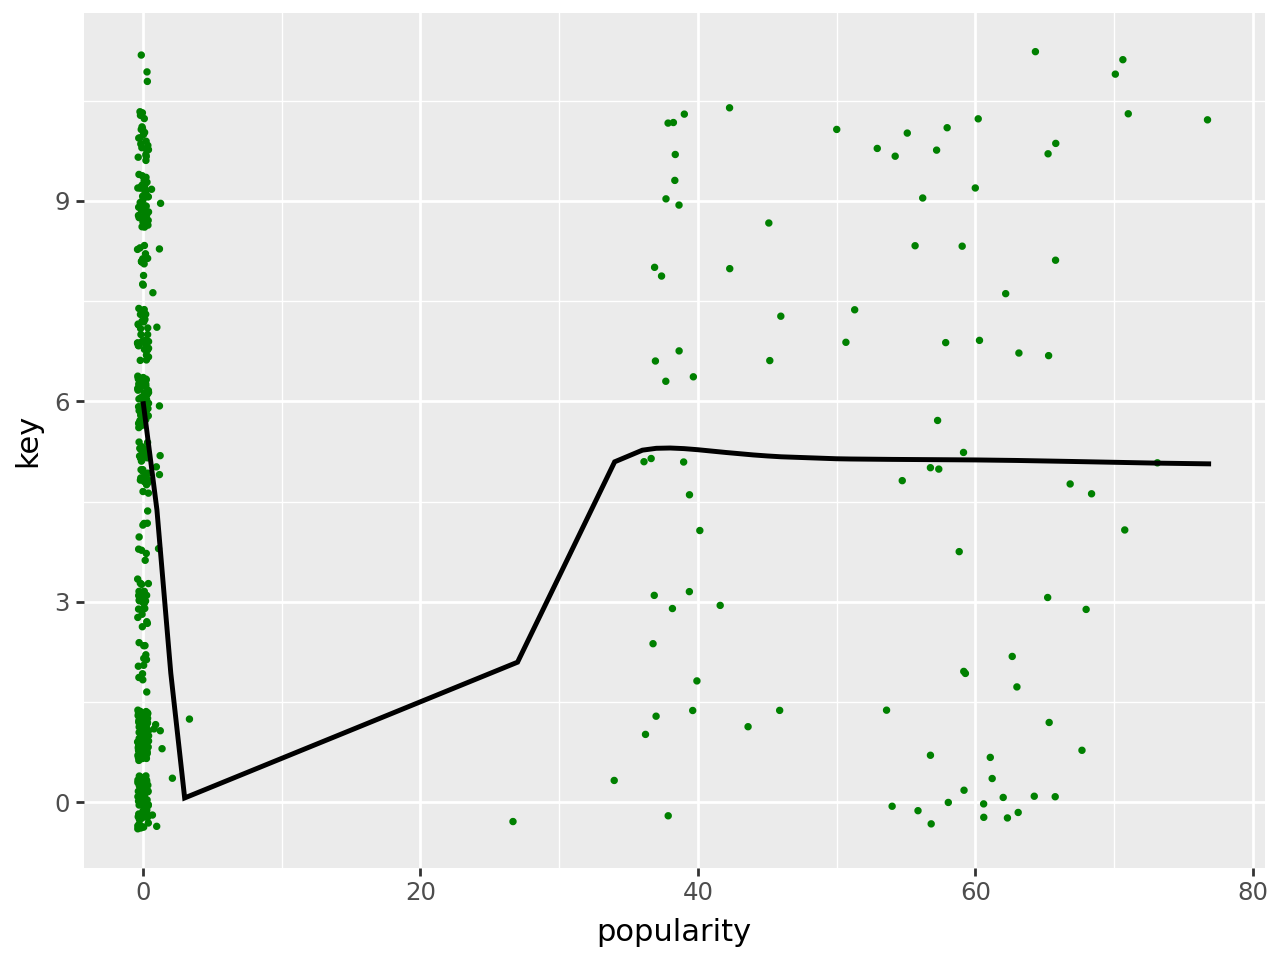

In [4]:
import plotnine as p9
from sklearn.model_selection import *
from sklearn.ensemble import RandomForestClassifier

#finding the graph from a specific genre and attribute
data_copy = data[data["track_genre"] == "jazz"]
display(
p9.ggplot(
data = data_copy,
    mapping = p9.aes(x='popularity', y='key'))+
p9.geom_point(color="green", position="jitter", size=0.5) + p9.geom_smooth()
)

Plot for genre: acoustic


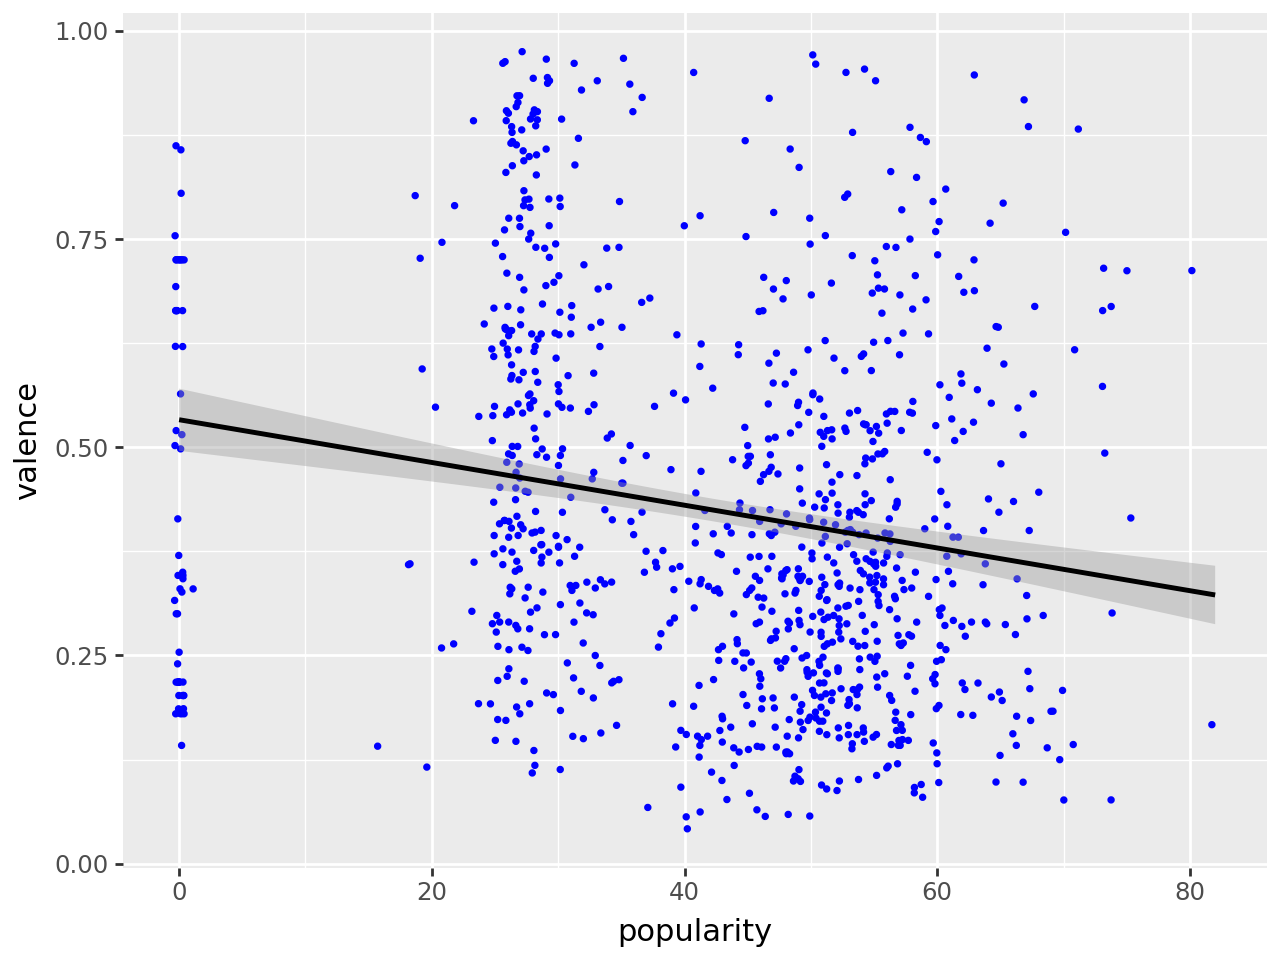

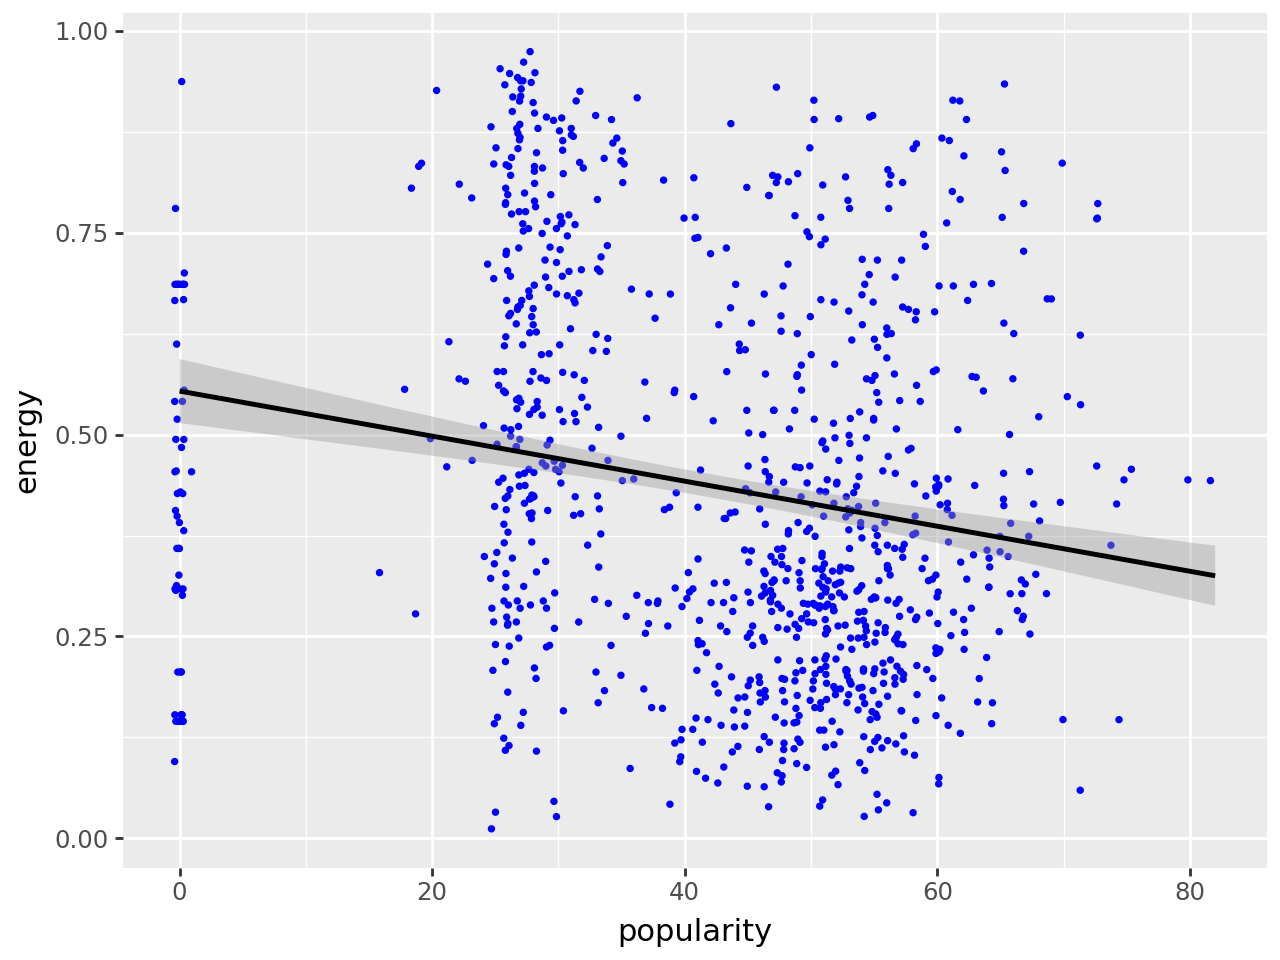

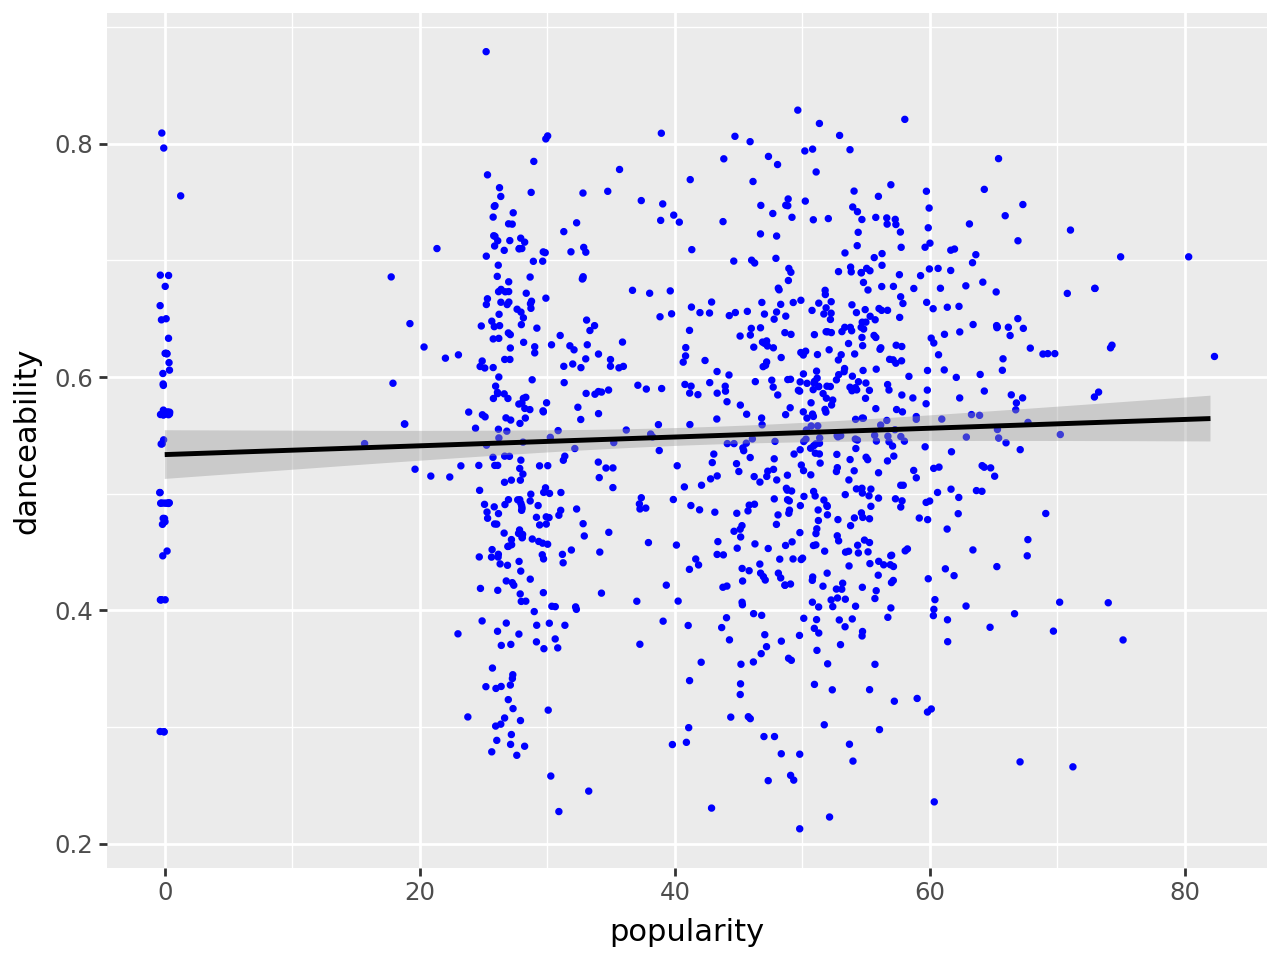

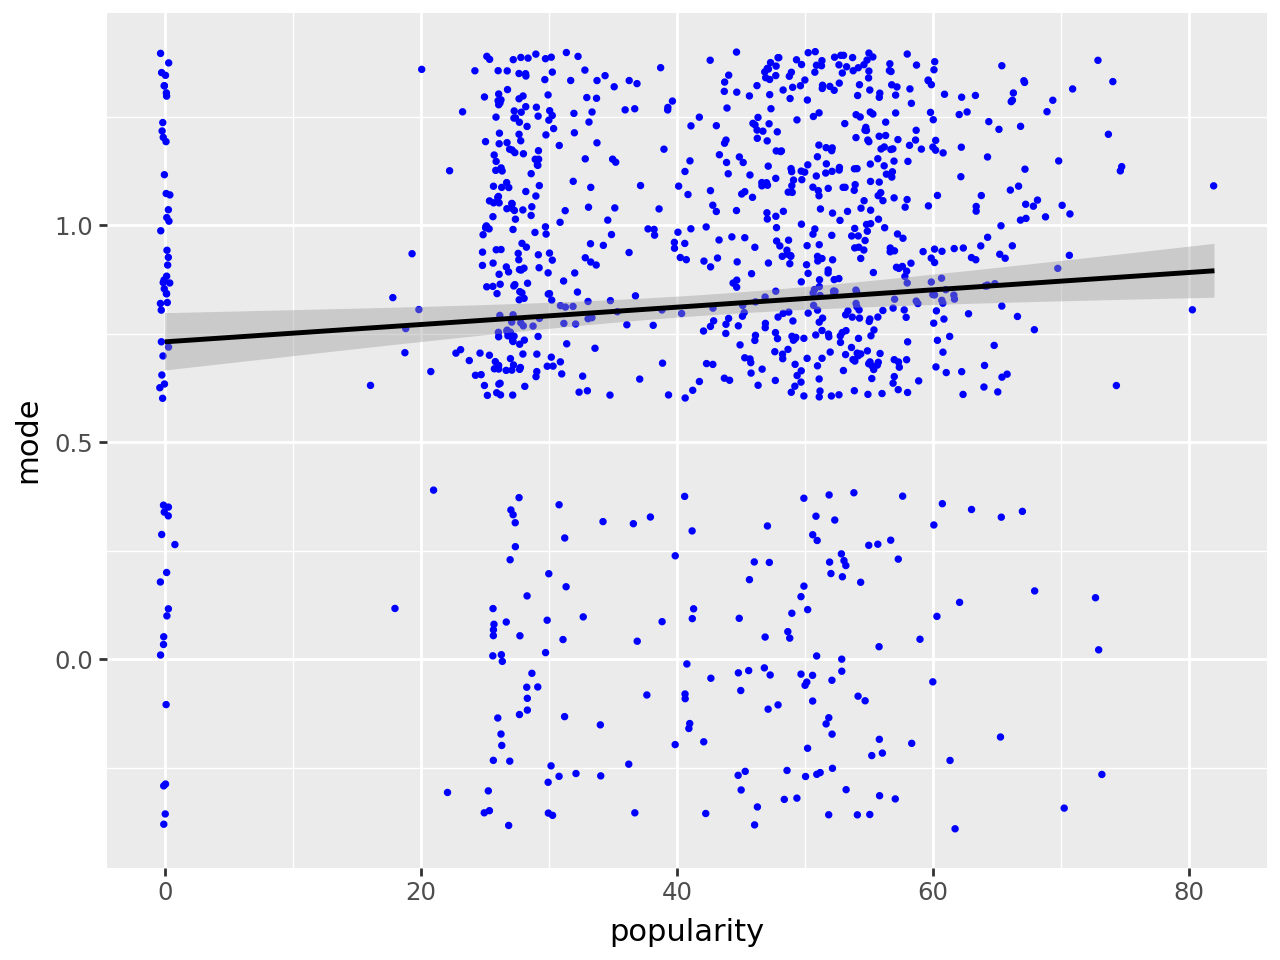

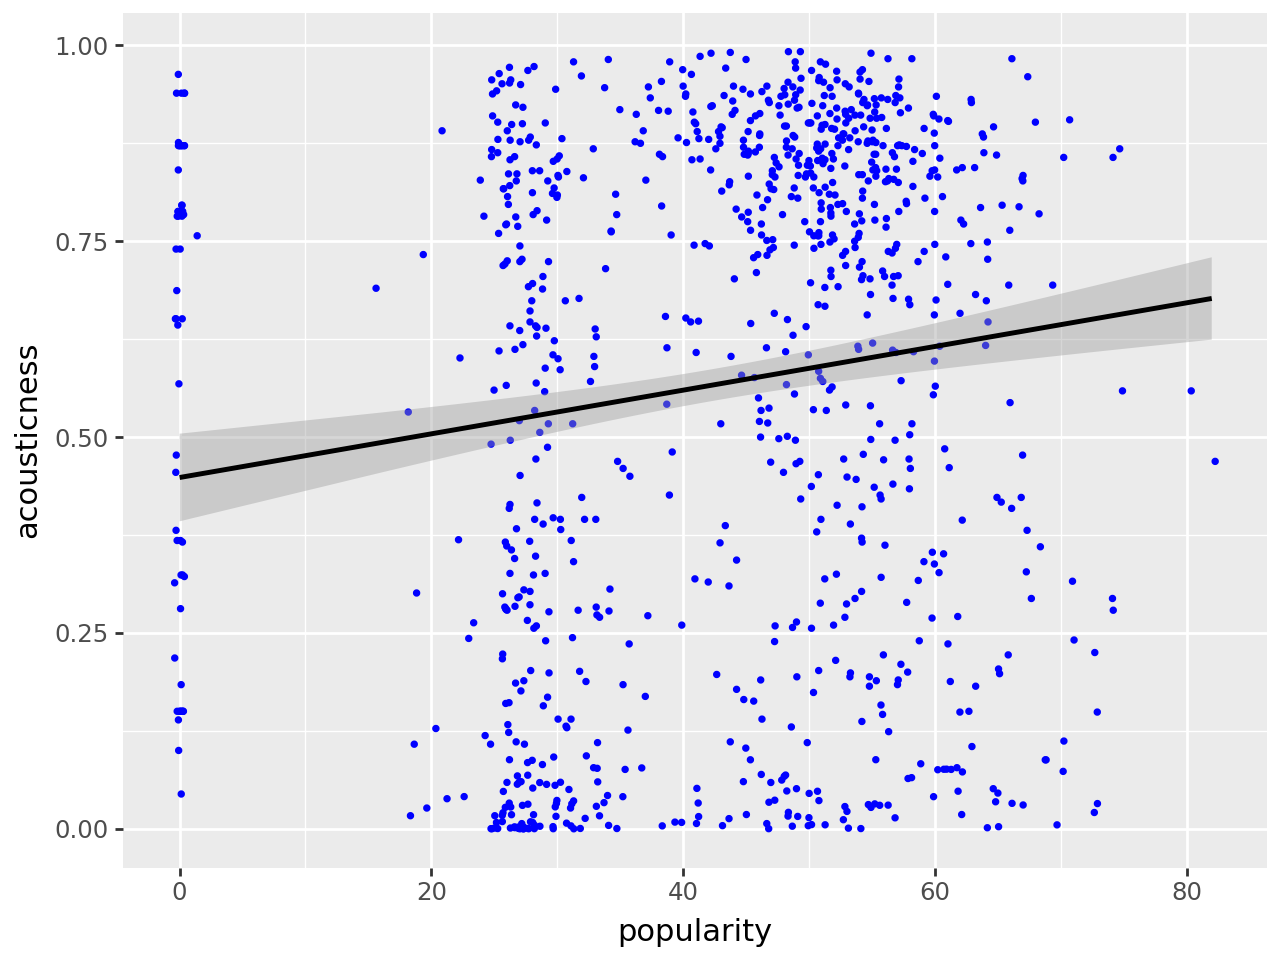

Plot for genre: afrobeat


C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


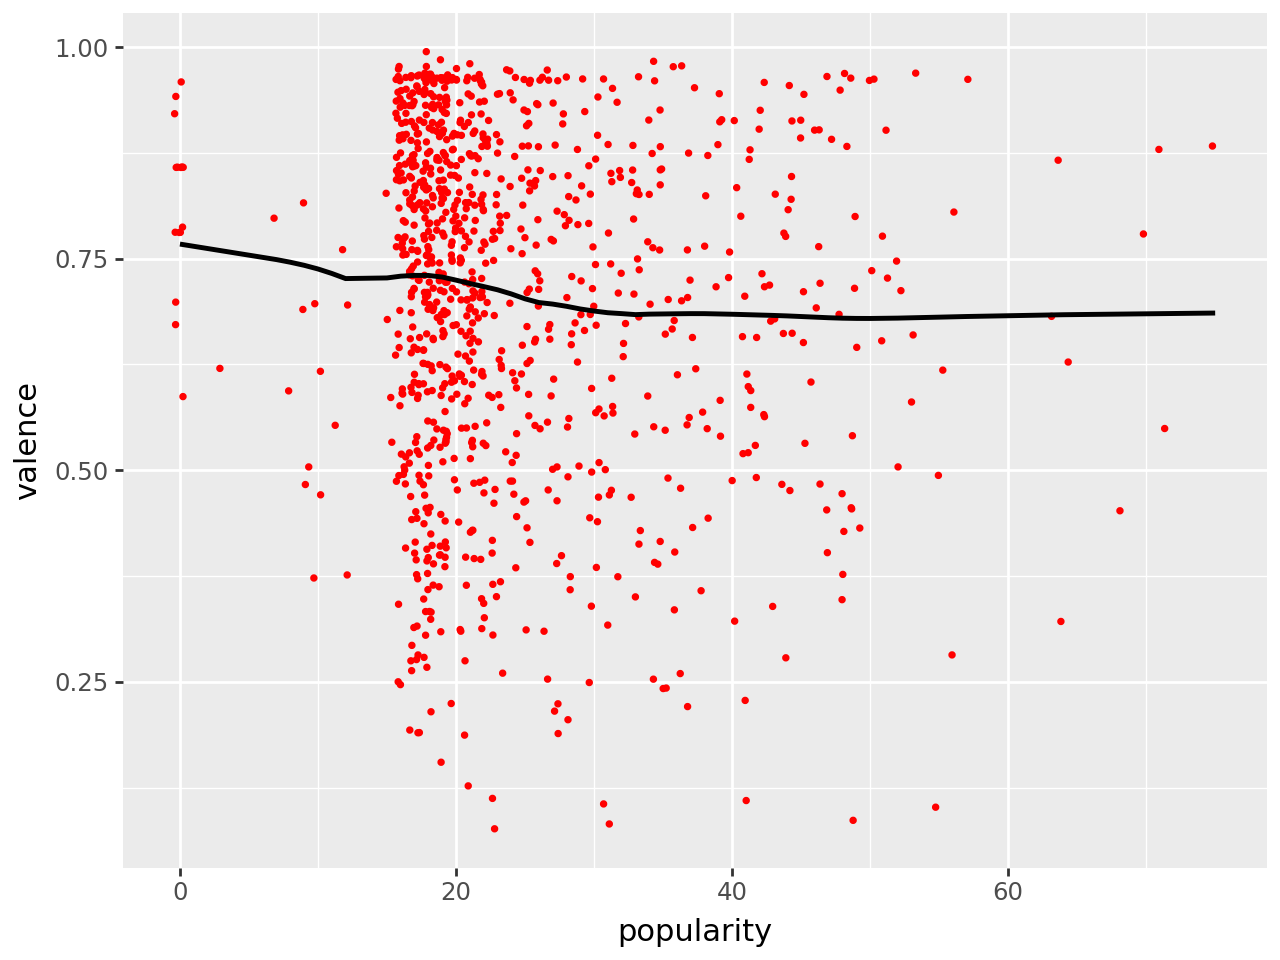

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


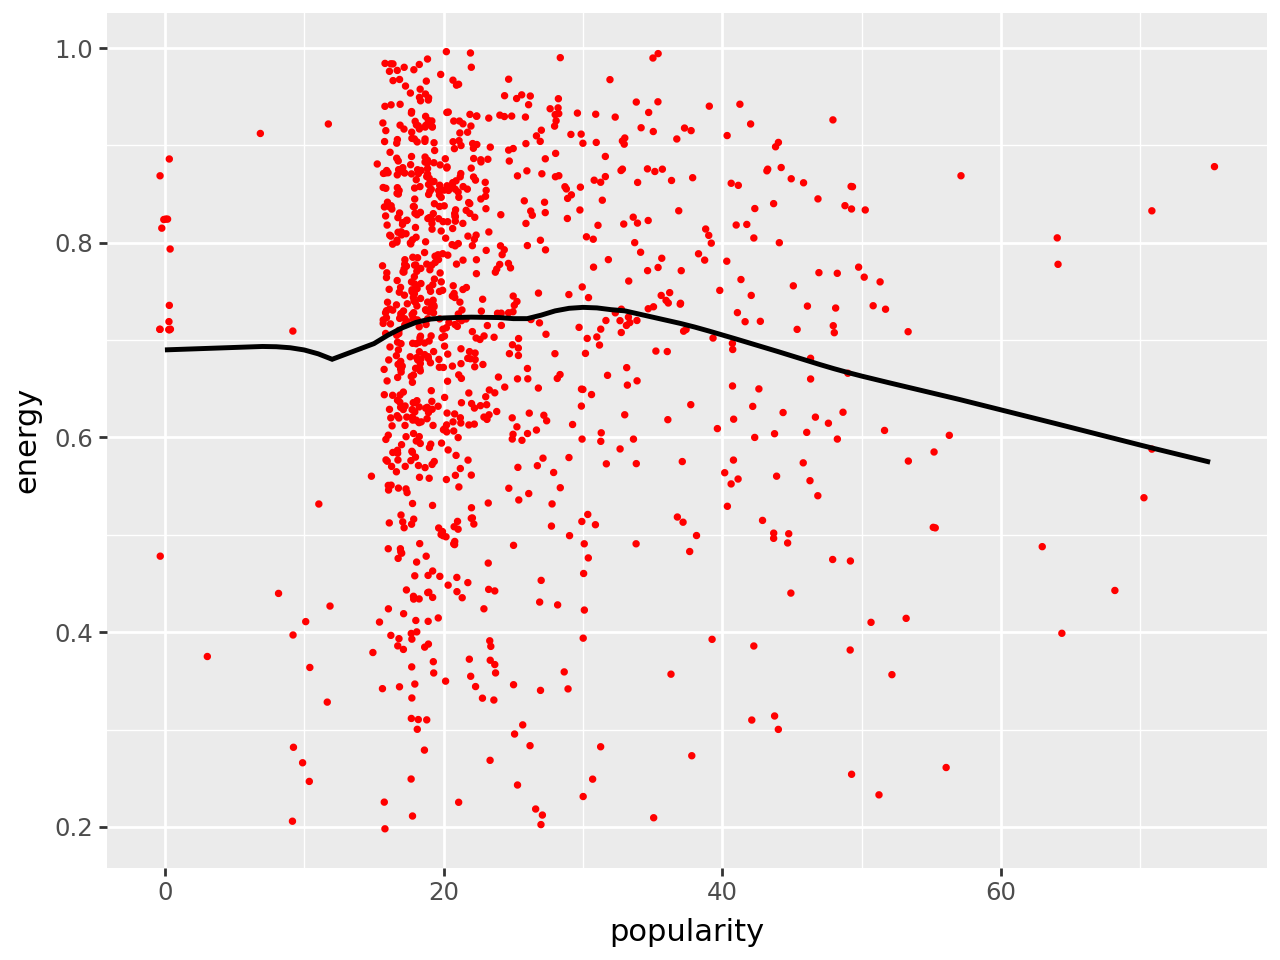

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


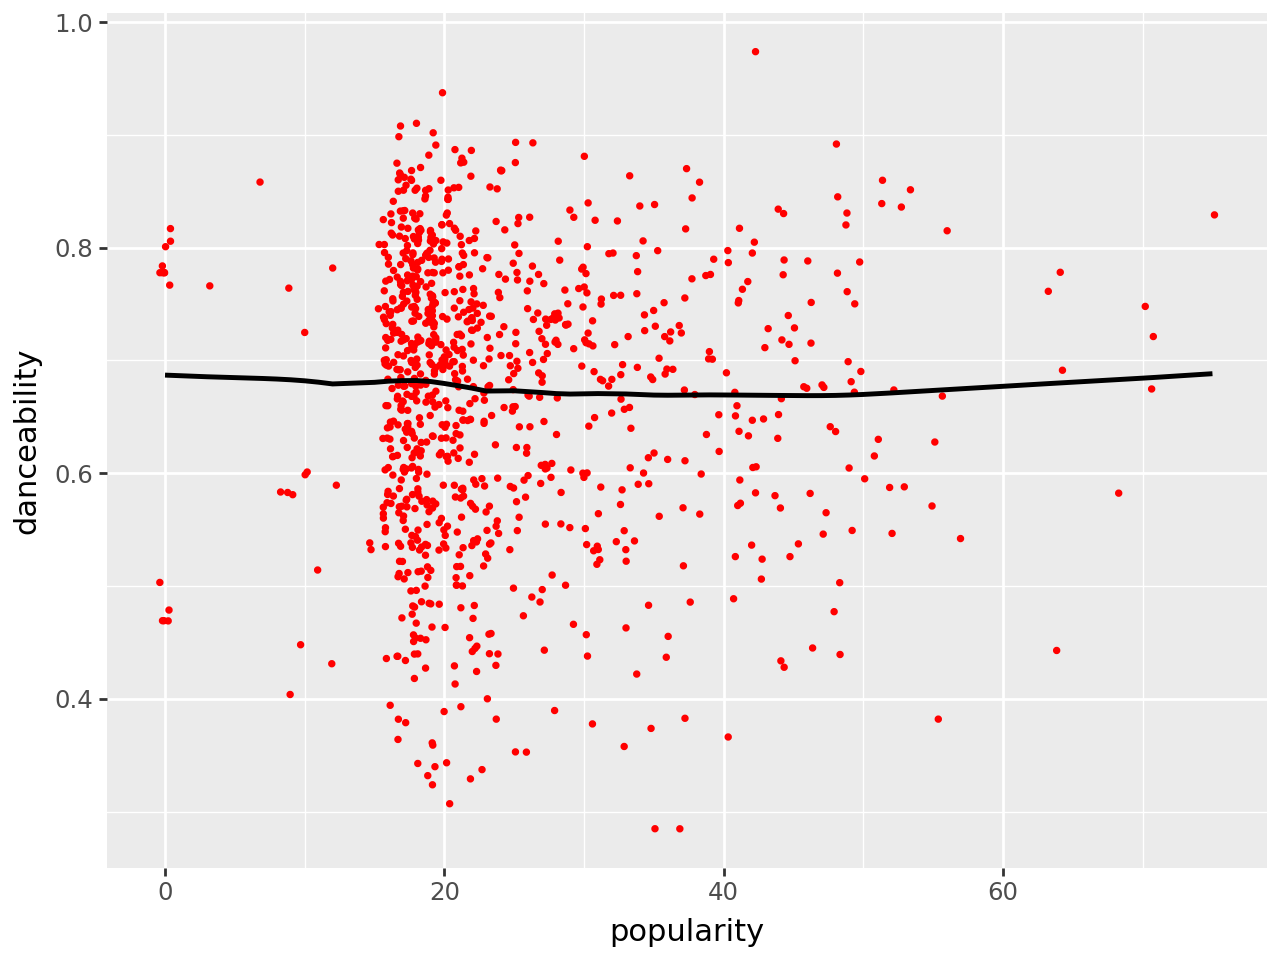

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


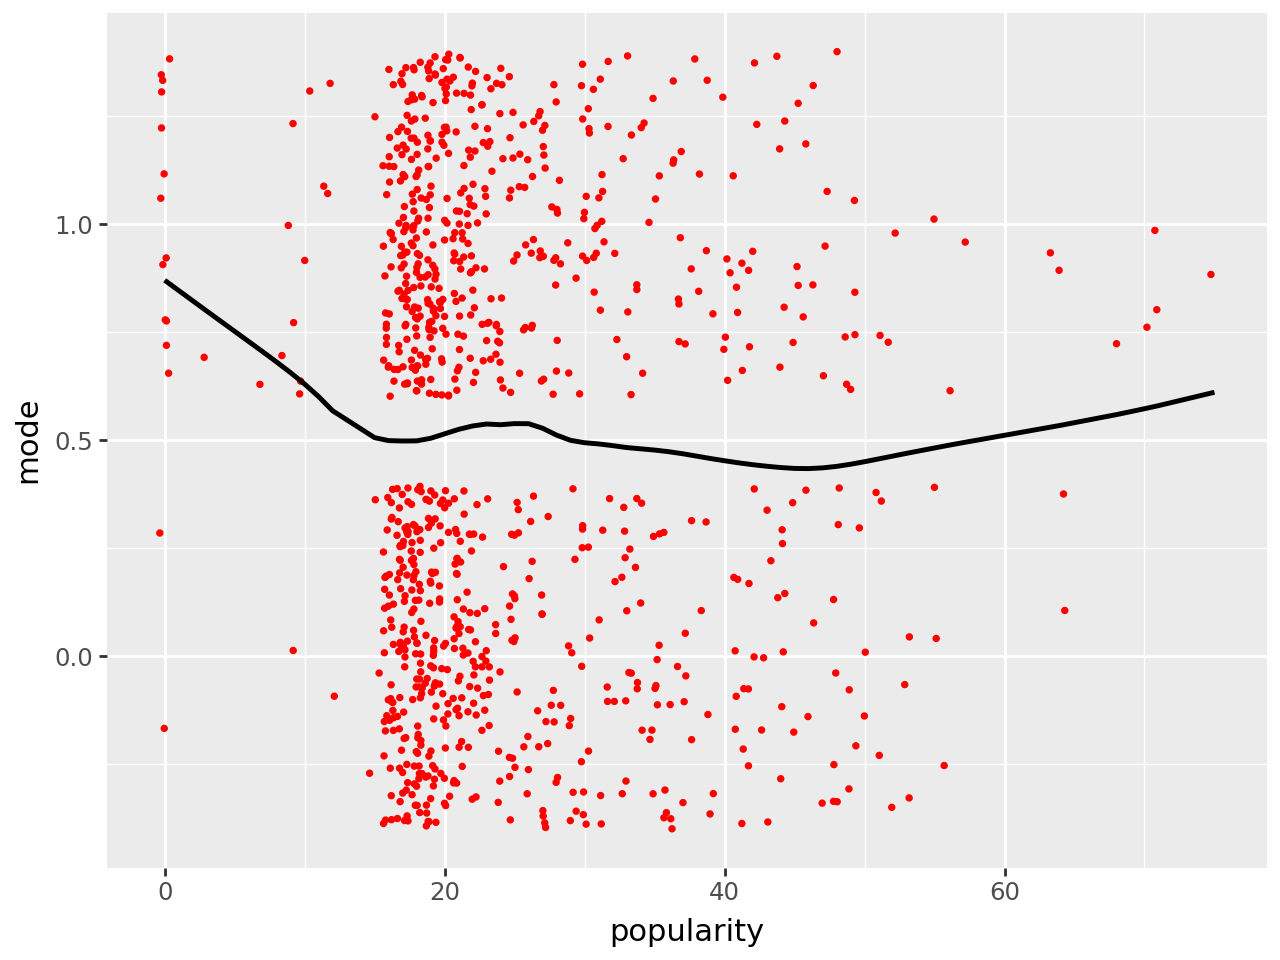

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


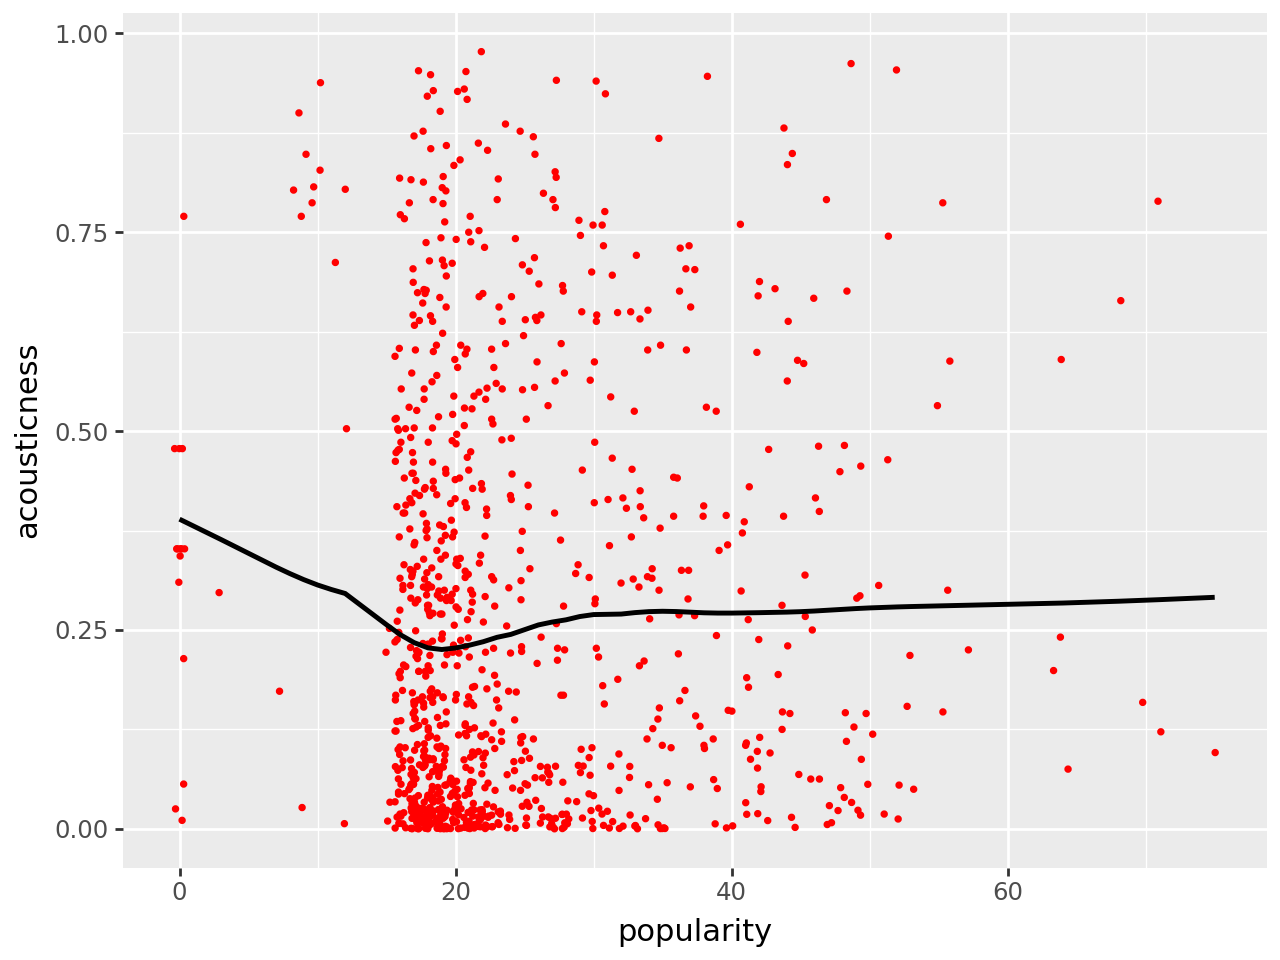

Plot for genre: alt-rock


C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


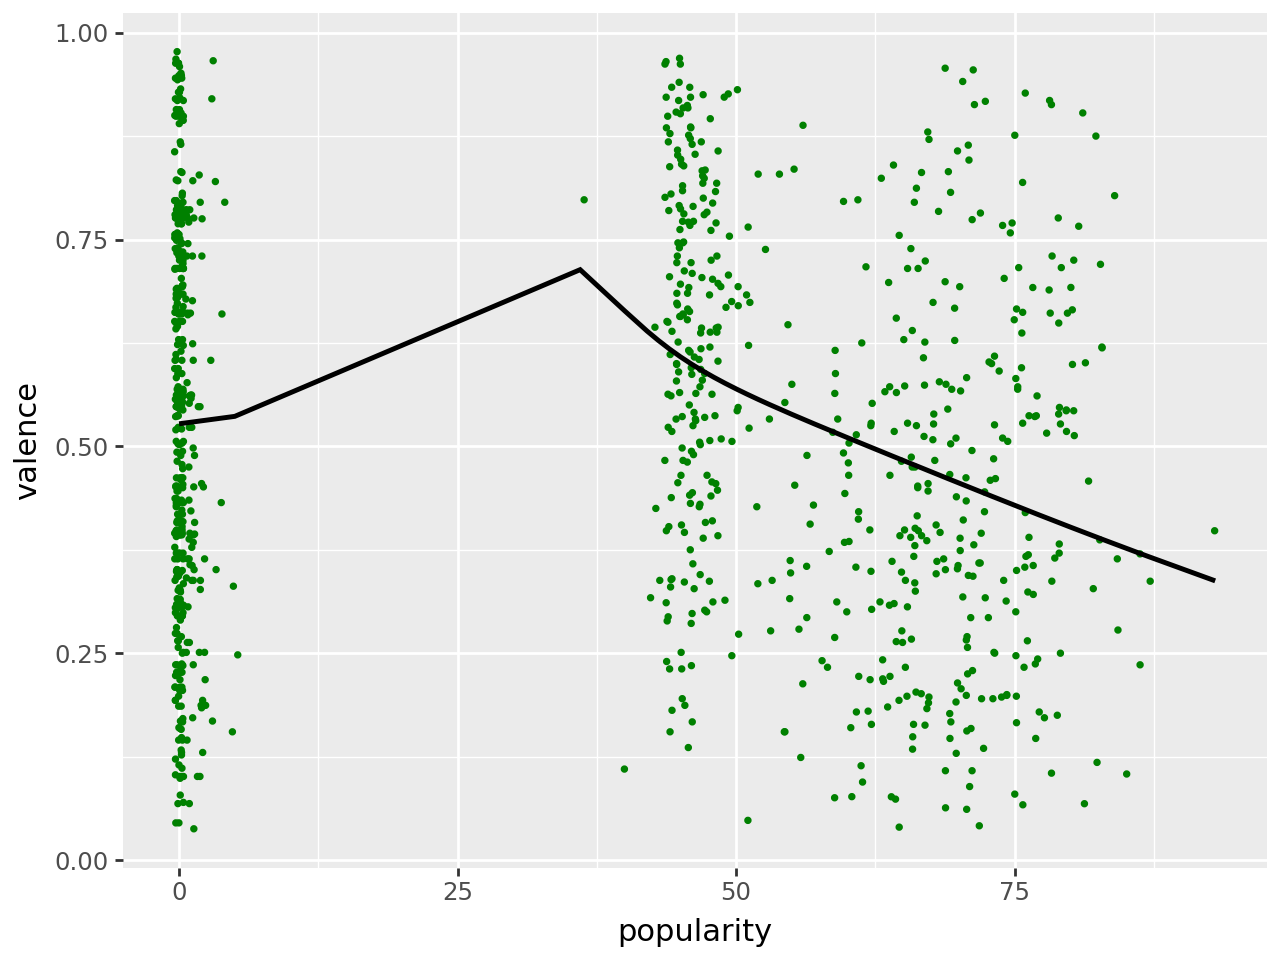

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


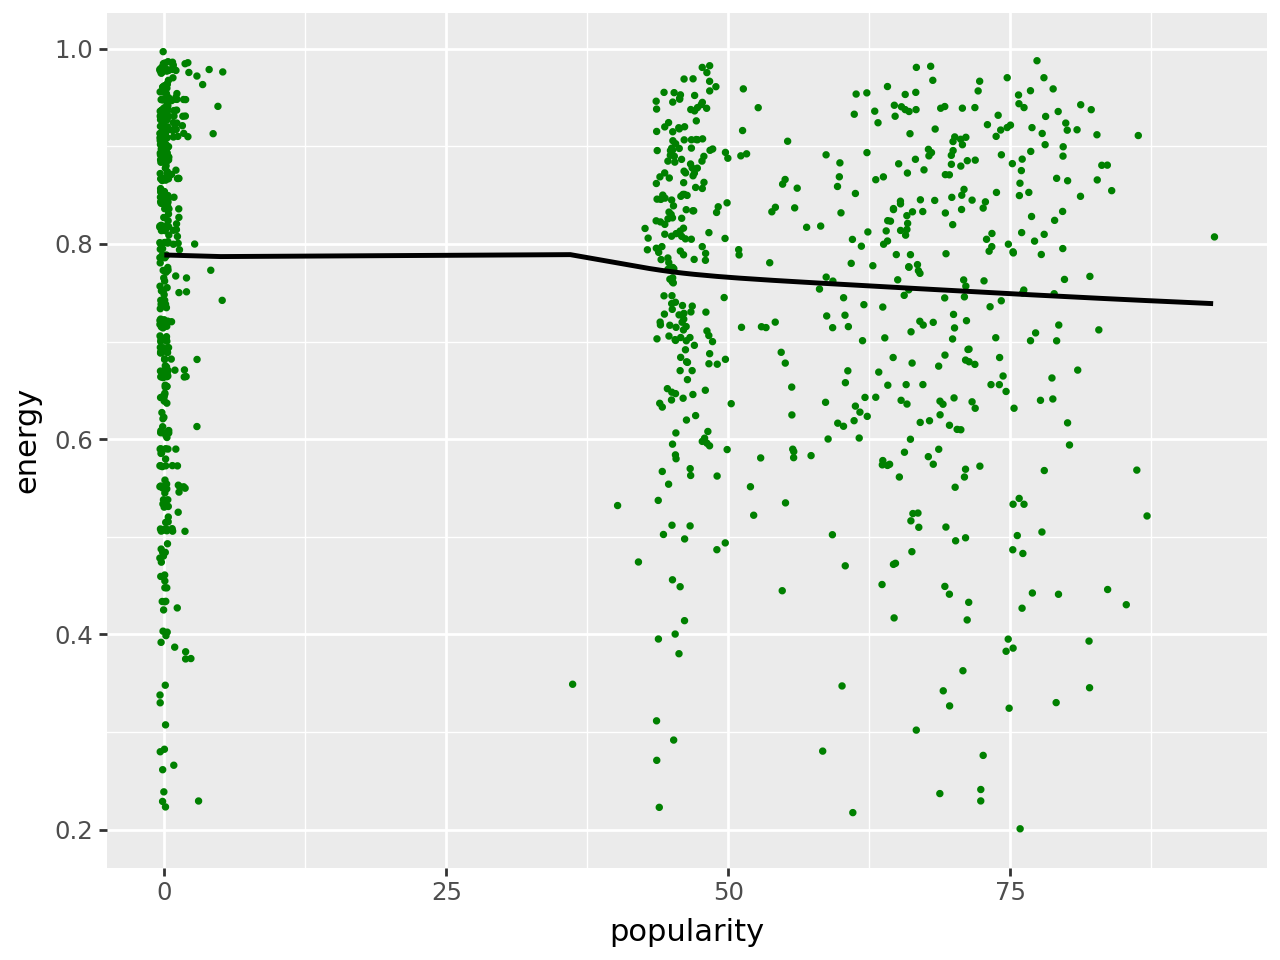

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


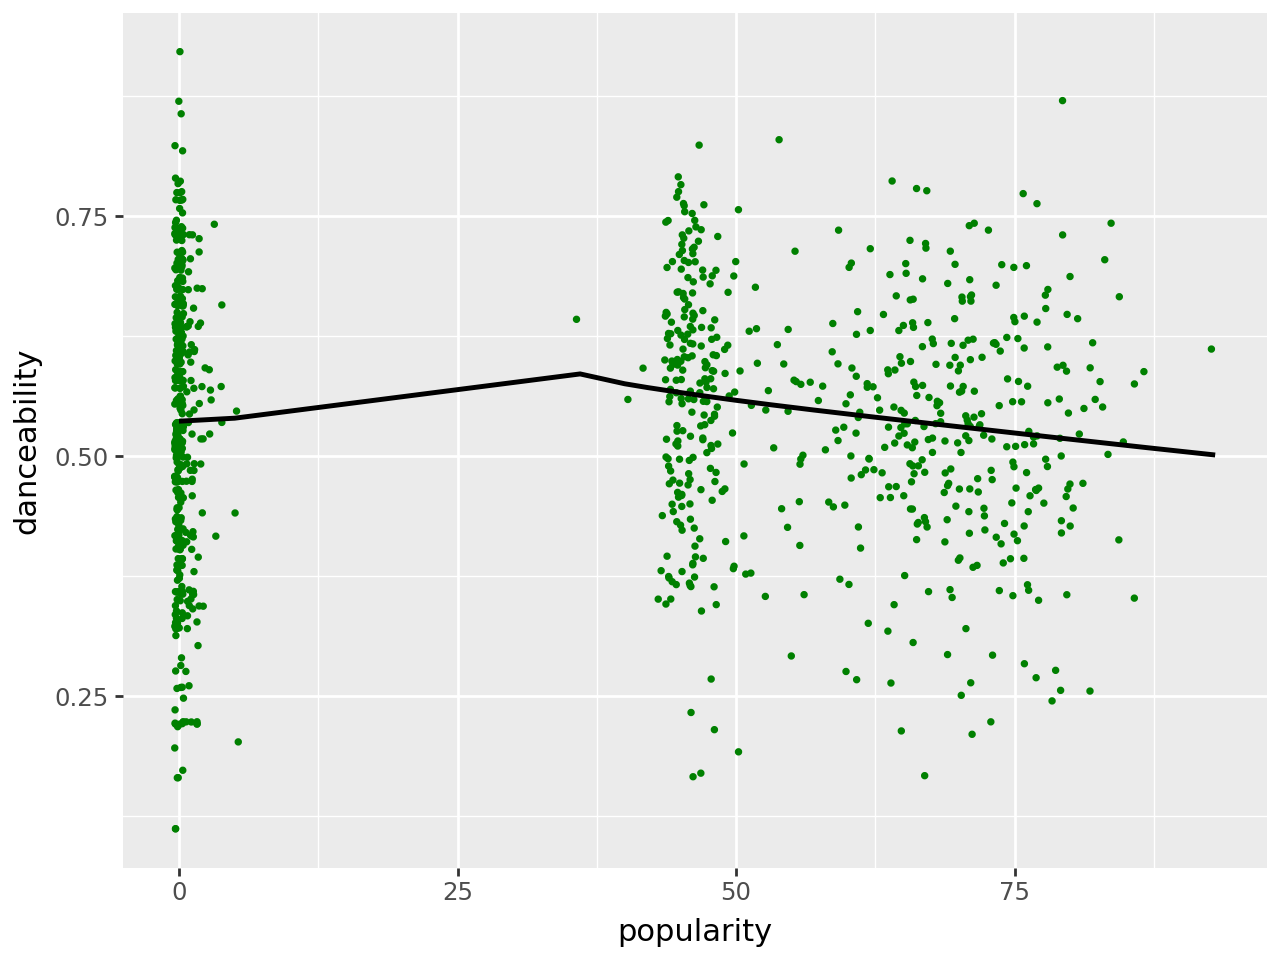

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


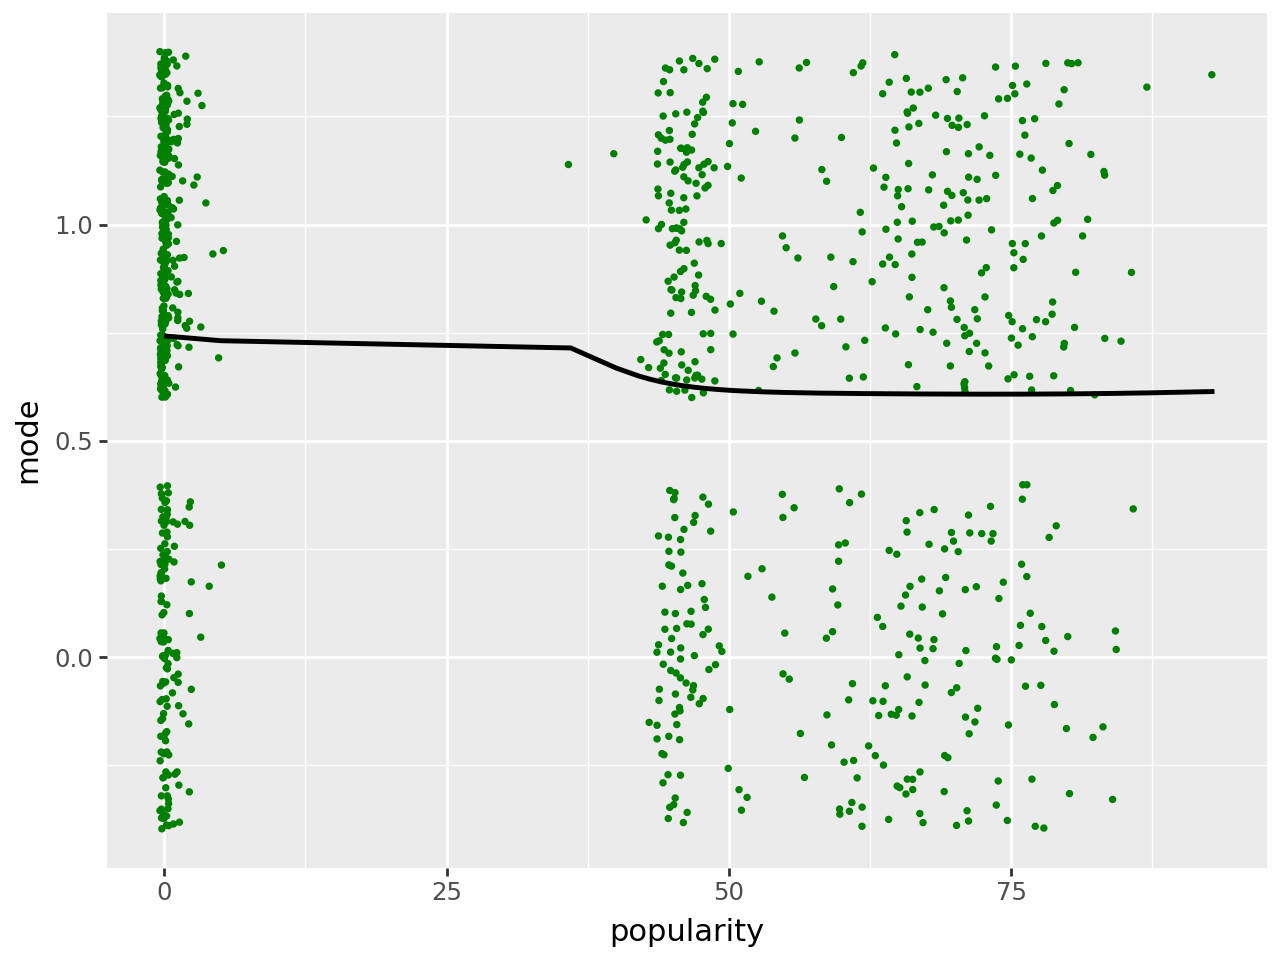

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


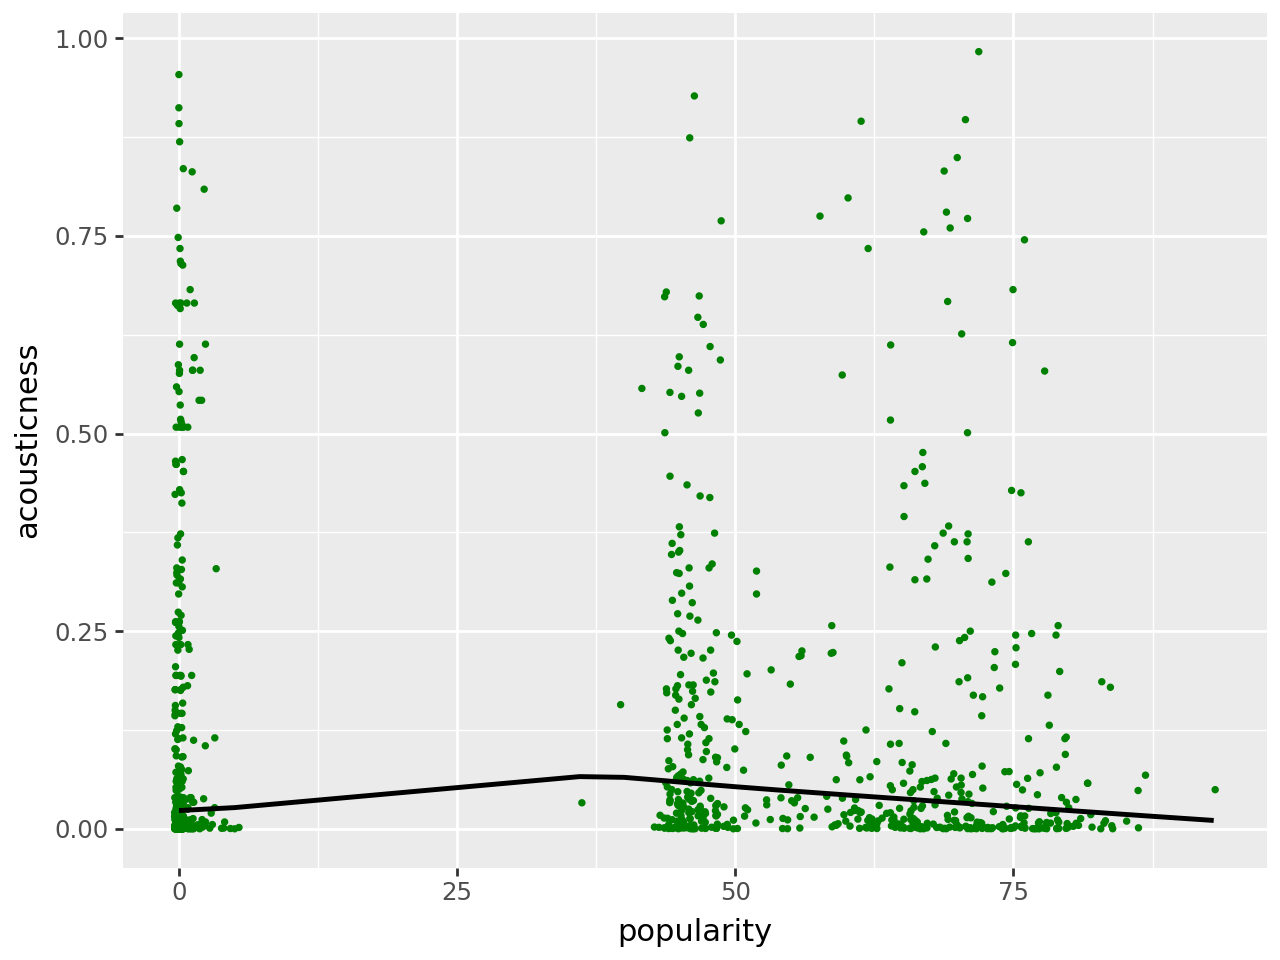

Plot for genre: ambient


C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


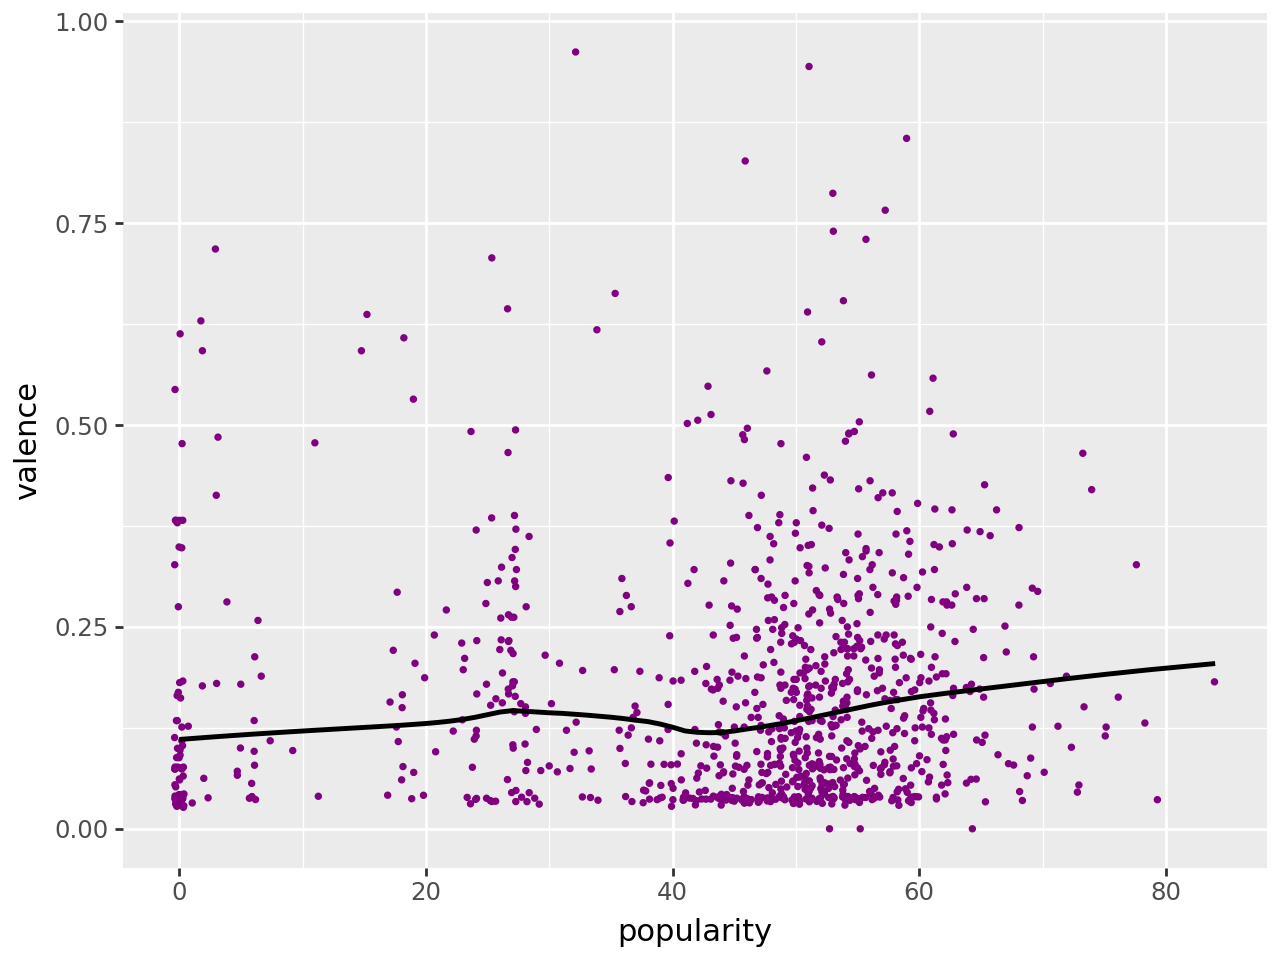

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


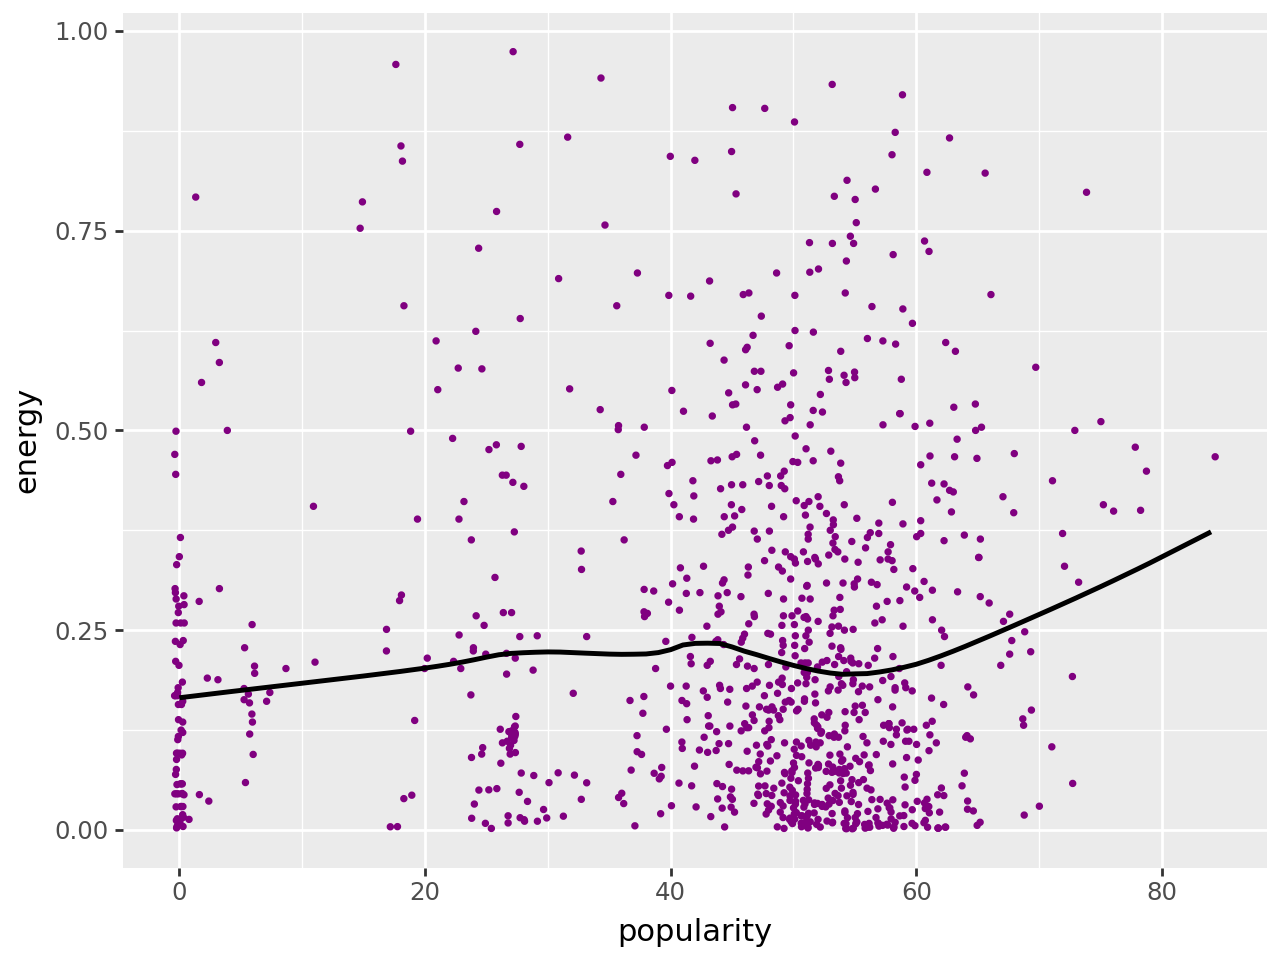

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


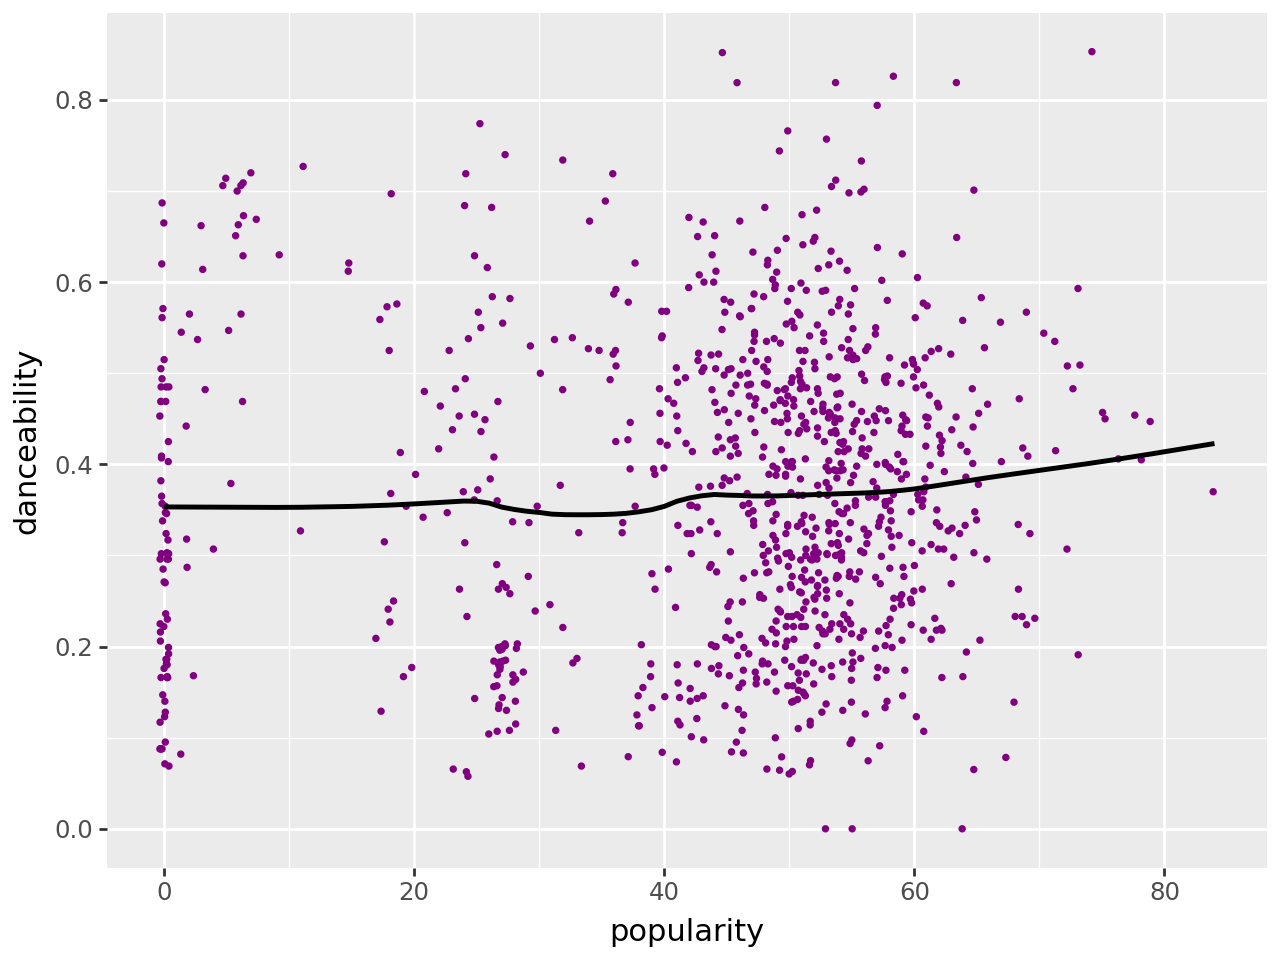

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


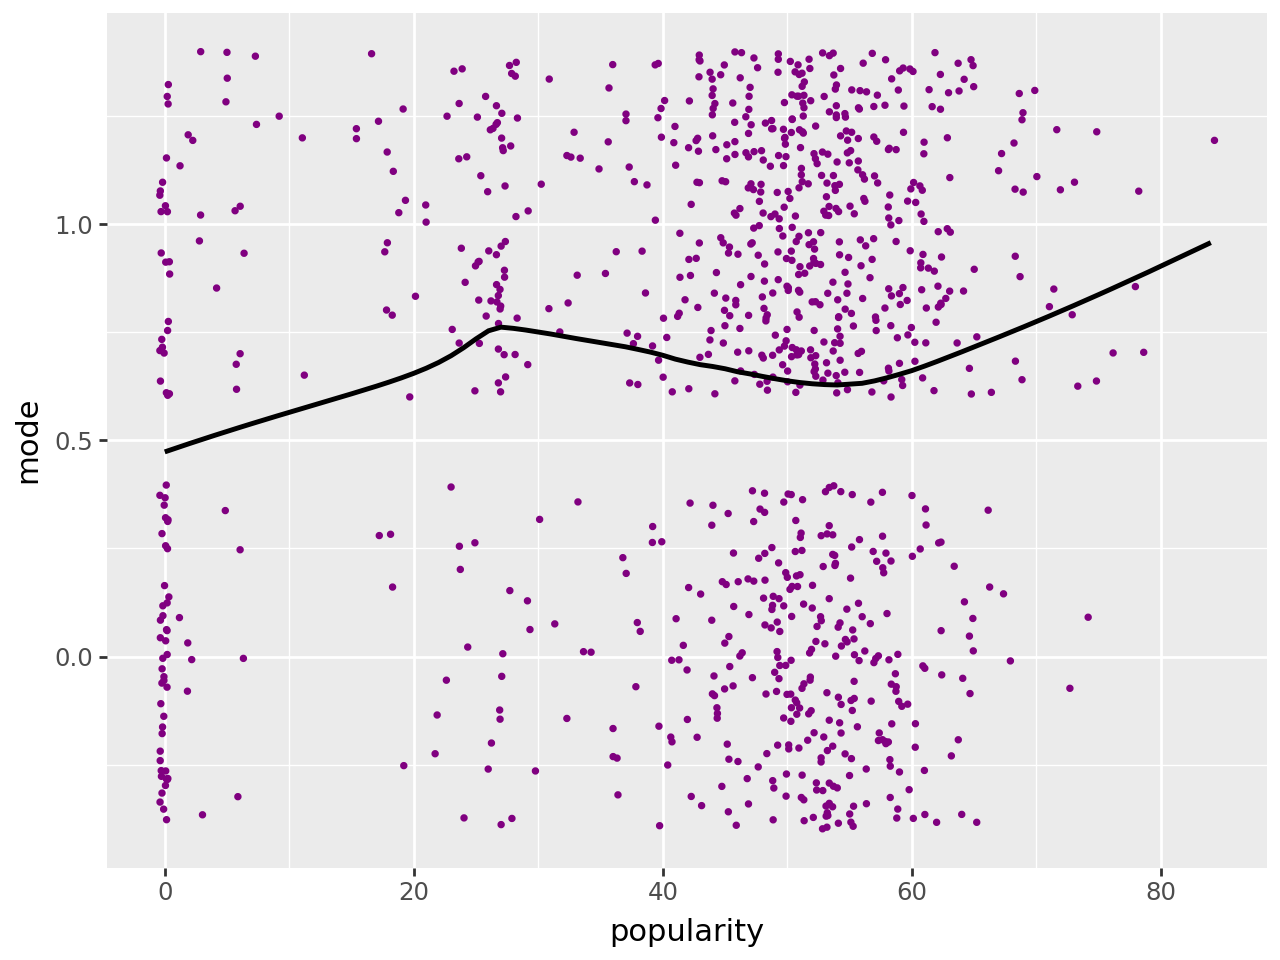

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


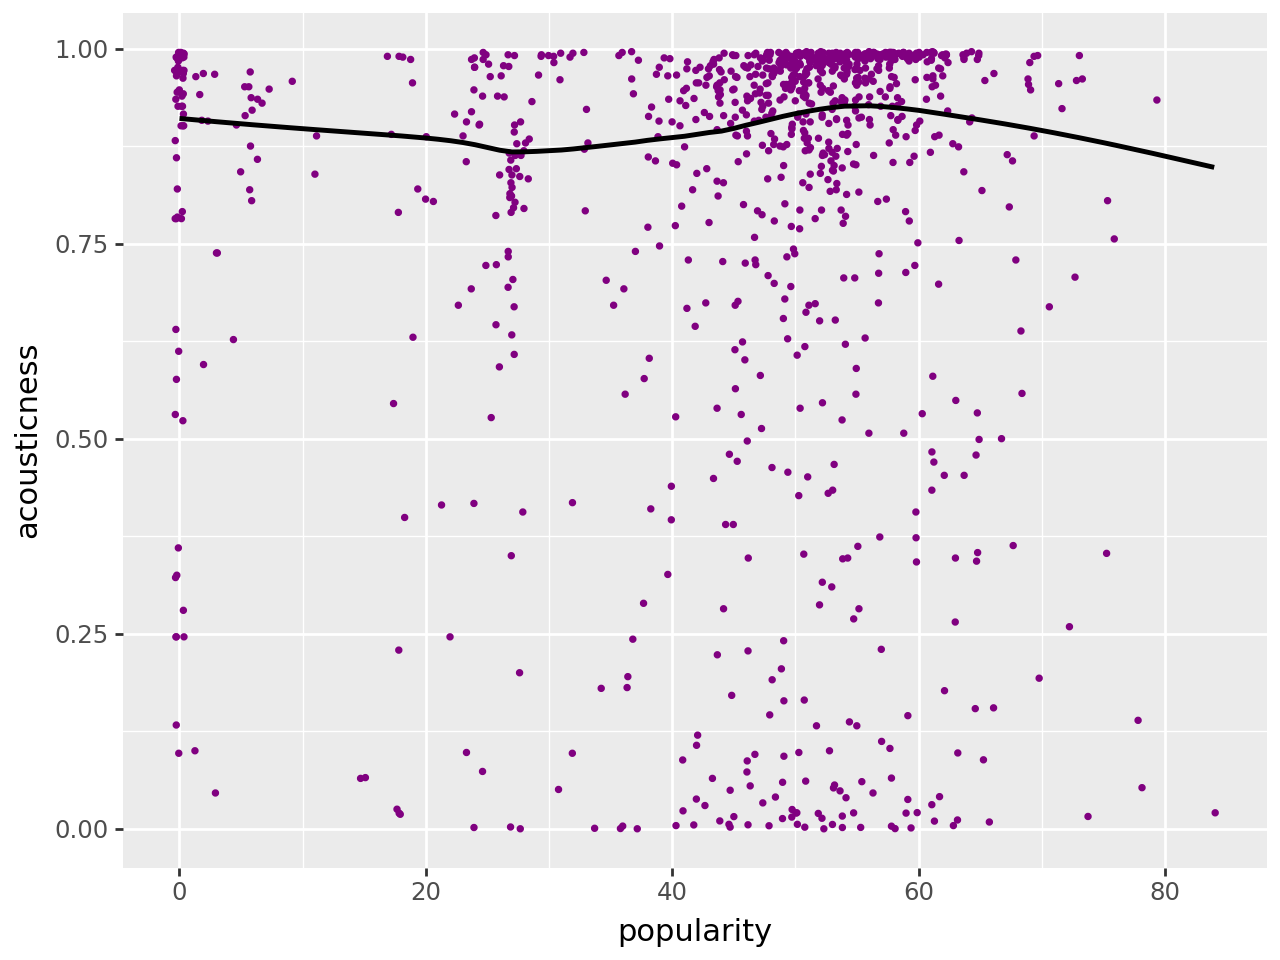

Plot for genre: cantopop


C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


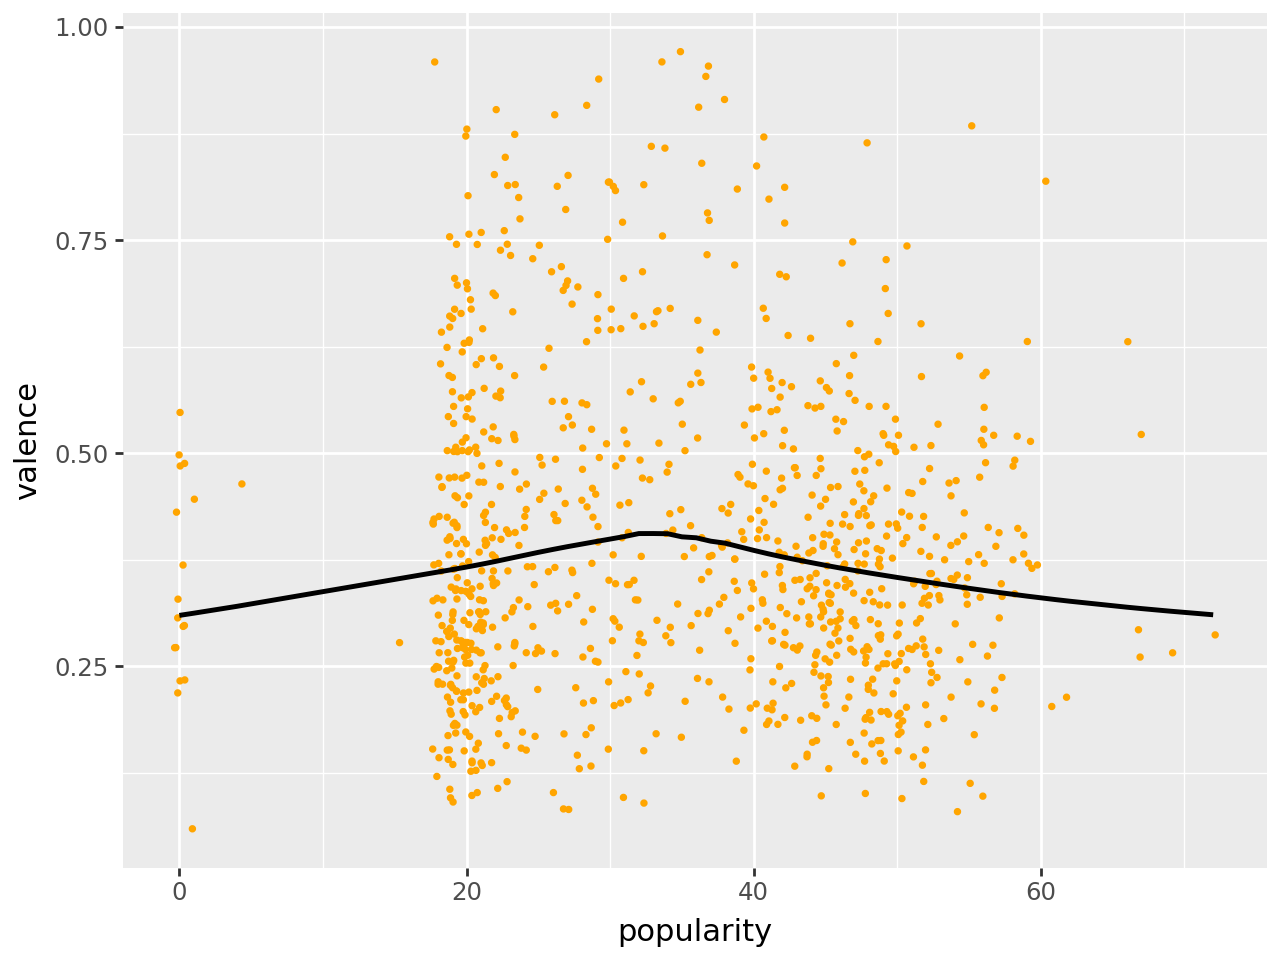

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


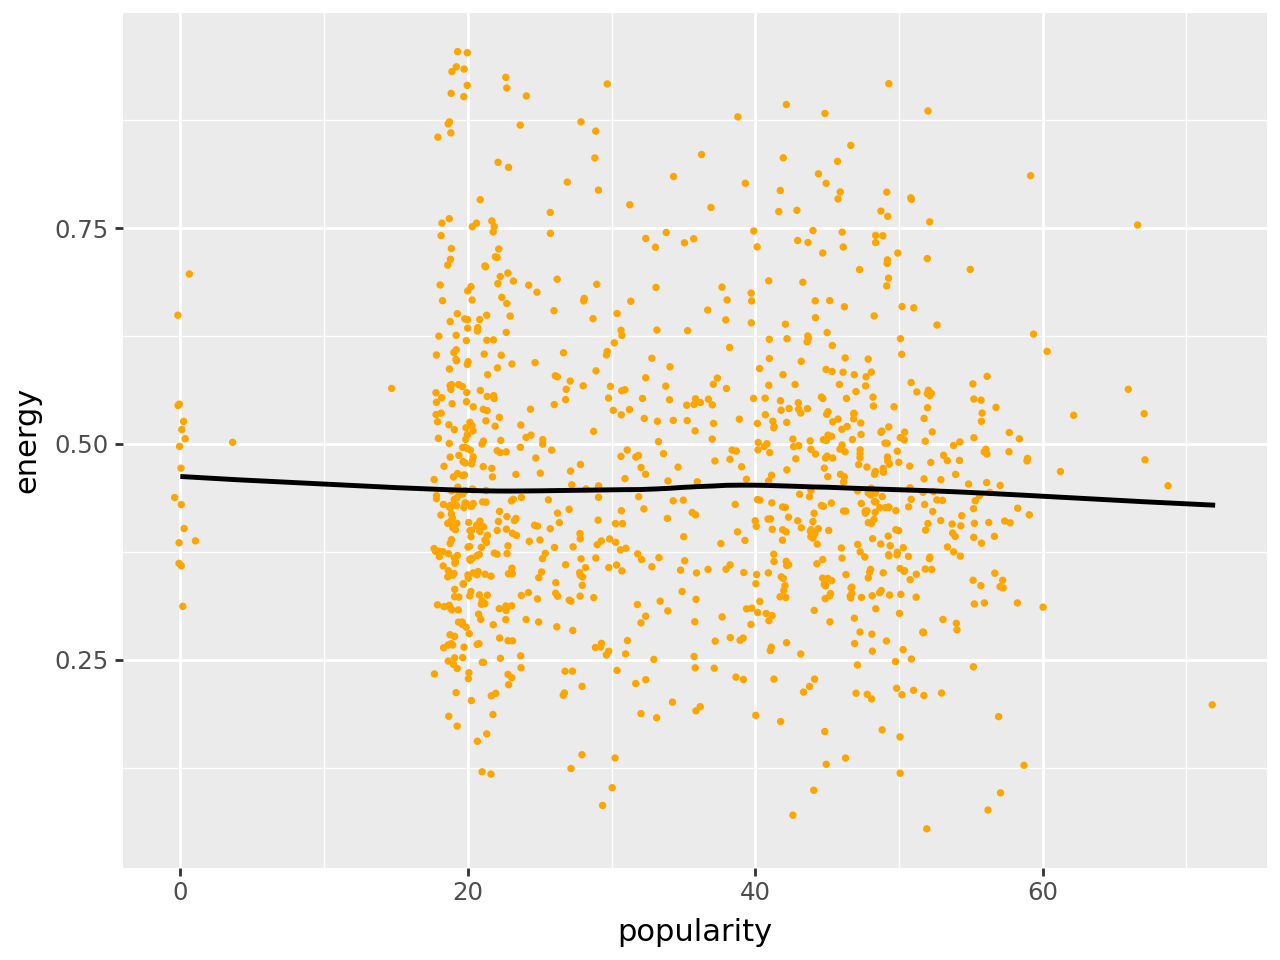

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


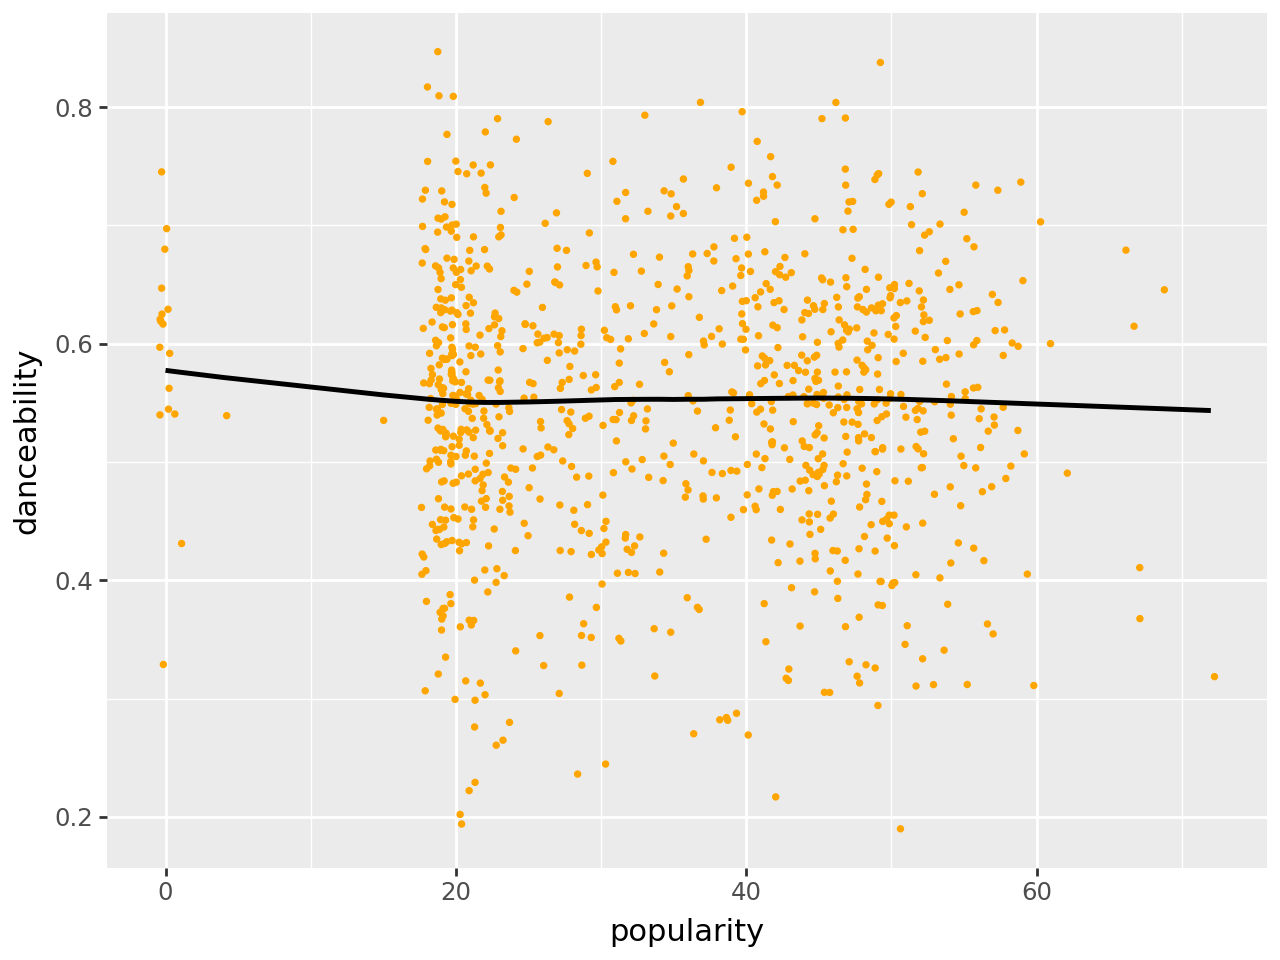

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


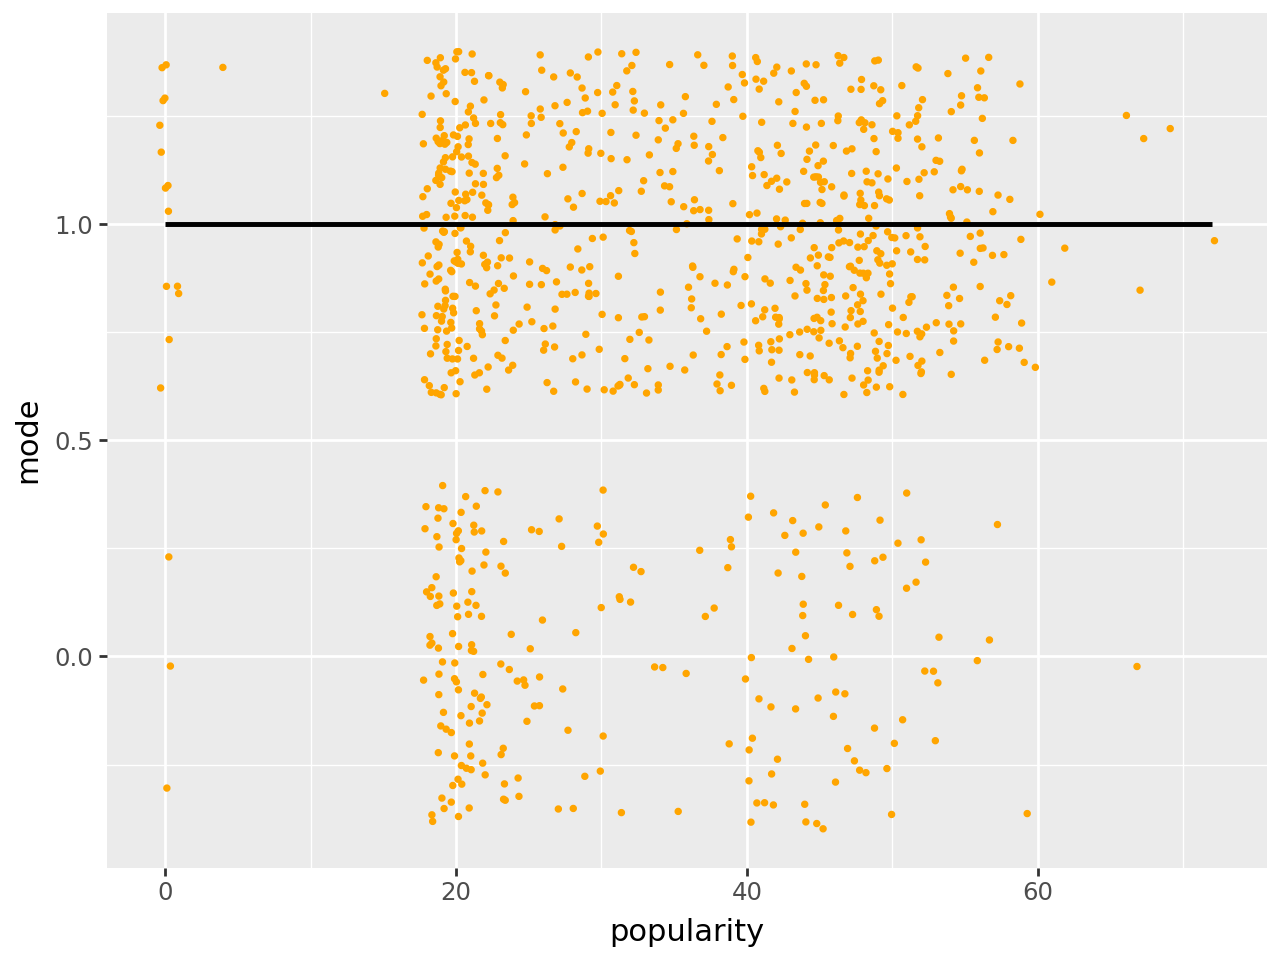

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


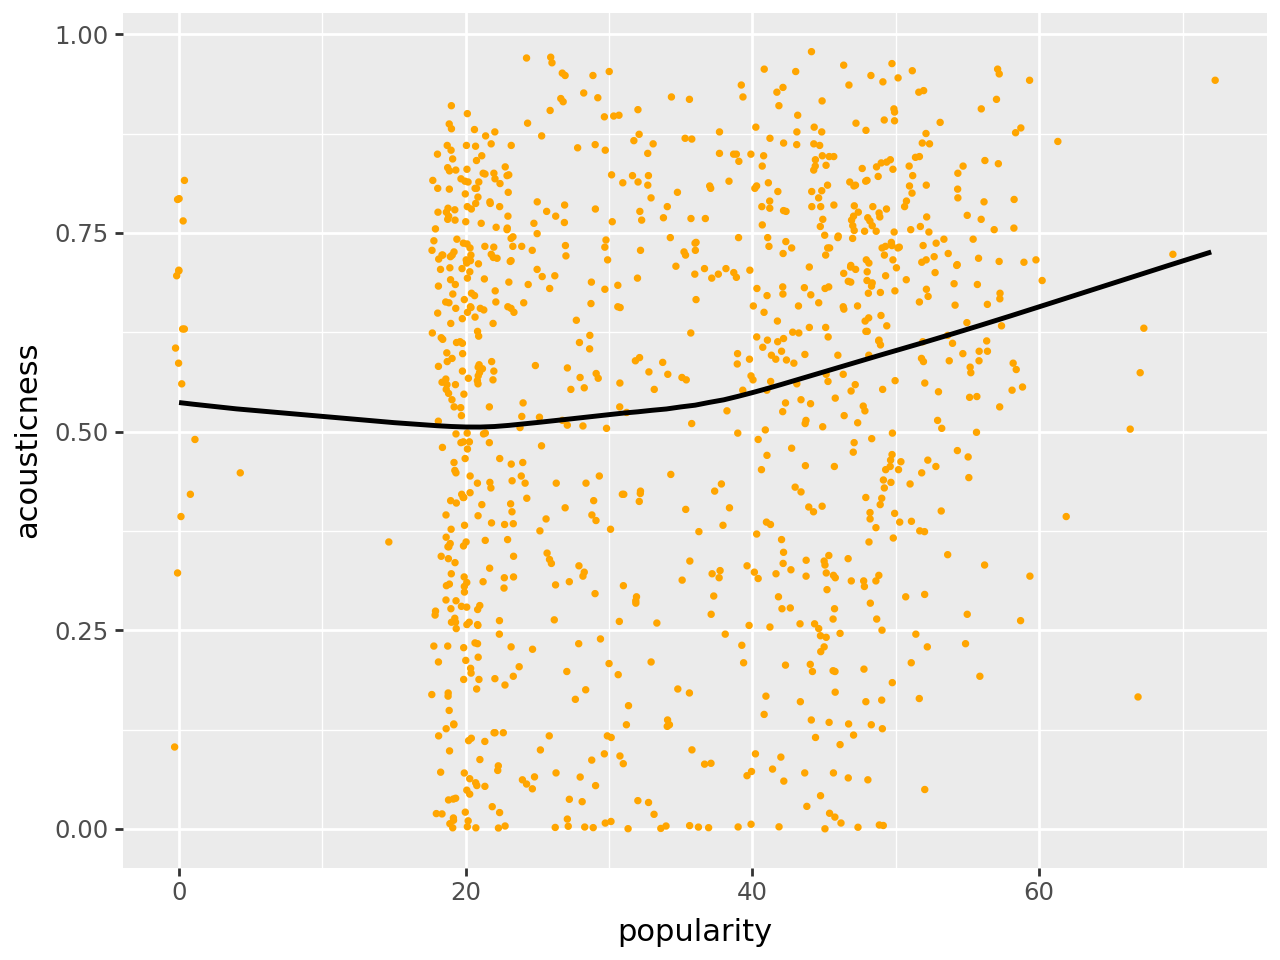

In [5]:
#method to find multiple graphs given 5 genres and attributes.
top5 = data['track_genre'].value_counts().head(5)
colors = ["blue", "red", "green", "purple", "orange"]
metadata = ["valence", "energy", "danceability", "mode", "acousticness"]

for i in range(5):
    genre = top5.index[i]
    data_copy = data[data["track_genre"] == genre]
    print(f"Plot for genre: {genre}")
    for j in range(5):
        display(
        p9.ggplot(
        data = data_copy,
        mapping = p9.aes(x='popularity', y=metadata[j]))+
        p9.geom_point(color=colors[i], position="jitter", size=0.5) + p9.geom_smooth()
        )

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
unique_genres_list = data["track_genre"].unique().tolist()
#method to predict using RandomForest and ALL genres, returns sorted DataFrame with accuracy and MSE for each genre.
def prediction(data, genres):
    results_df = pd.DataFrame({'genre': ['genre_name'], 'accuracy': ["acc"], "MSE": ["mse"]})
    for i in range(1,len(genres)):
        data_copy = data[data["track_genre"] == genres[i]]
        X = data_copy.drop("popularity", axis=1)  
        X = X.drop("track_id", axis=1)
        X = X.drop("artists", axis=1)
        X = X.drop("album_name", axis=1)
        X = X.drop("track_name", axis=1)
        X = X.drop("track_genre", axis=1)
        #X = X.drop("mode", axis=1)
        y = data_copy["popularity"]
        X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.3)
        rf = RandomForestClassifier(n_estimators=200,max_depth=4, random_state=2).fit(X_train, y_train)
        pred = rf.predict(X_test)
        acc = accuracy_score(y_test, pred)
        mse = mean_squared_error(y_test, pred)
        results_df.loc[len(results_df)] = [genres[i], acc, mse]
    results_df = results_df.drop(0, axis=0).reset_index(drop=True)
    results_df_sorted = results_df.sort_values(by='accuracy', ascending=False)
    return results_df_sorted



#knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
#pred = knn.predict(X_test)

result = prediction(data, unique_genres_list)
print(result) 
print("Average accuracy: " + str(result['accuracy'].mean()))
print("Average MSE: " + str(result['MSE'].mean()))

           genre  accuracy          MSE
63          jazz   0.78481   522.063291
92       romance  0.621324    67.216912
58       iranian  0.619529    22.474747
66         latin  0.561404   573.118421
2    alternative  0.536585  1134.447154
..           ...       ...          ...
31    electronic  0.044177        515.0
64         k-pop  0.043636   119.258182
103        study      0.04       456.43
107       techno      0.04      379.912
43        grunge  0.030888   306.312741

[112 rows x 3 columns]
Average accuracy: 0.1833956101199854
Average MSE: 669.543838708699


Next we tryed to predict popularity with the song and his data.

In [11]:
from sklearn.ensemble import RandomForestRegressor

numeric_columns = ["duration_ms", "explicit", "danceability", "energy", "key", "loudness", "mode", "speechiness",  
                    "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]

song_gender = "jazz"
song_data = {
    "duration_ms": 180000,
    "explicit": 0,
    "danceability": 0.44,
    "energy": 0.65,
    "key": 2,
    "loudness": -6.2,
    "mode": 0,
    "speechiness": 0.100,
    "acousticness": 0.4,
    "instrumentalness": 0.0,
    "liveness": 0.44,
    "valence": 0.64,
    "tempo": 123.5,
    "time_signature": 4,
}

data_copy = data[data["track_genre"] == song_gender]

# Cleaning dataset from string 
X = data_copy.drop("popularity", axis=1)  
X = X.drop("track_id", axis=1)
X = X.drop("artists", axis=1)
X = X.drop("album_name", axis=1)
X = X.drop("track_name", axis=1)
X = X.drop("track_genre", axis=1)

X_full = data_copy[numeric_columns]
y_full = data_copy["popularity"]

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

model = RandomForestRegressor().fit(X_train_full, y_train_full)

df_song = pd.DataFrame([song_data])
prediction = model.predict(df_song)[0]

popularity = "Very low popularity"
if (prediction >= 25 and prediction < 50): popularity = "Low popularity"
elif (prediction >= 50 and prediciton < 75): popularity = "High popularity"
elif (prediction >= 75 and prediciton < 100): popularity = "Very high popularity"
print("Predicted popularity:", popularity, prediction)

Predicted popularity: Low popularity 25.51734696969697
